✅ Berhasil Load Data!


/tmp/ipykernel_55/4147501623.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Reds_r')


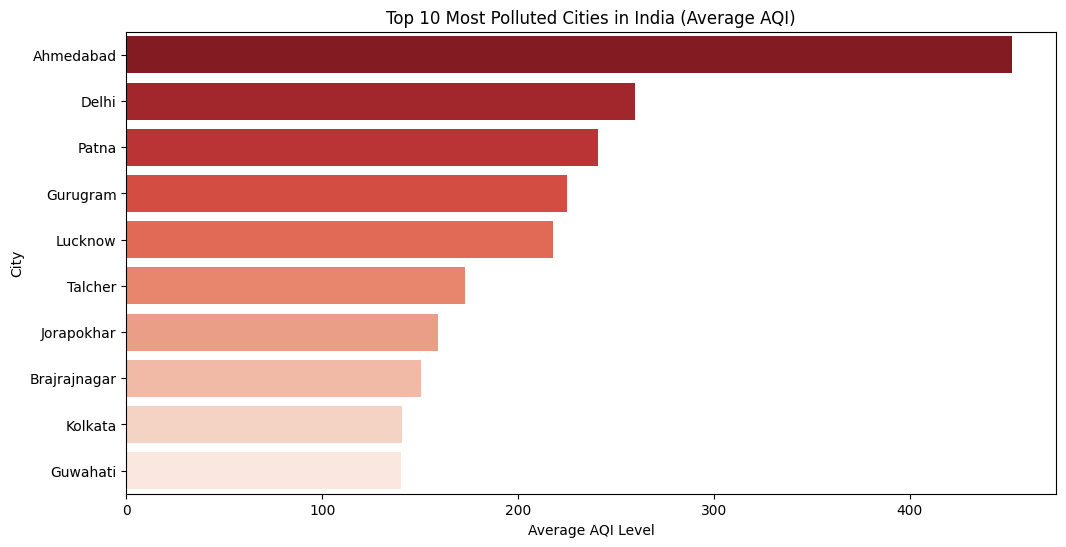

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/kaggle/input/datasets/rohanrao/air-quality-data-in-india/city_day.csv'
df = pd.read_csv(path)
print("Berhasil Load Data!")

df['Date'] = pd.to_datetime(df['Date'])
df_clean = df.dropna(subset=['AQI'])

plt.figure(figsize=(12, 6))
top_cities = df_clean.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Reds_r')
plt.title('Top 10 Most Polluted Cities in India (Average AQI)')
plt.xlabel('Average AQI Level')
plt.show()

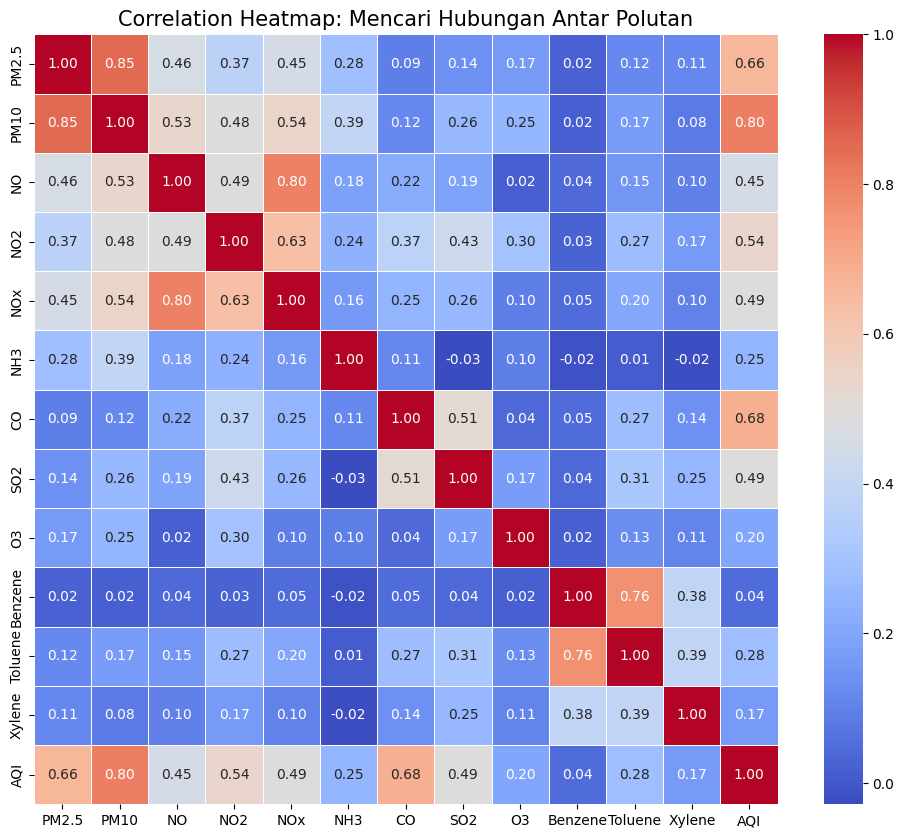

In [5]:

pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
corr_matrix = df_clean[pollutants].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Mencari Hubungan Antar Polutan', fontsize=15)
plt.show()

In [7]:
import folium
from folium.plugins import MarkerCluster

df_map = df.dropna(subset=['AQI', 'City']).sort_values('Date')
latest_df = df_map.groupby('City').last().reset_index()

coords = {
    'Delhi': [28.6139, 77.2090],
    'Mumbai': [19.0760, 72.8777],
    'Bengaluru': [12.9716, 77.5946],
    'Chennai': [13.0827, 80.2707],
    'Hyderabad': [17.3850, 78.4867]
}

m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
for city, loc in coords.items():
    if city in latest_df['City'].values:
        aqi = latest_df[latest_df['City'] == city]['AQI'].values[0]
        
        color = 'green' if aqi <= 50 else 'orange' if aqi <= 150 else 'red'
        
        folium.Marker(
            location=loc,
            popup=f"{city} - AQI: {aqi}",
            icon=folium.Icon(color=color, icon='info-sign')
        ).add_to(m)

m

In [13]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

city_data = df_clean[df_clean['City'] == 'Delhi']['AQI'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(city_data)

X, y = [], []
window_size = 7 

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print(f"Data siap! Total data training: {len(X)}")

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1) 
])

model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

model.fit(X, y, batch_size=32, epochs=20)
print(" data selesai.")

Data siap! Total data training: 1992


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0423
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0085
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0085
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0084
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0070
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0072
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065
Epoch 15/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0072
Epoch 16/20
63

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


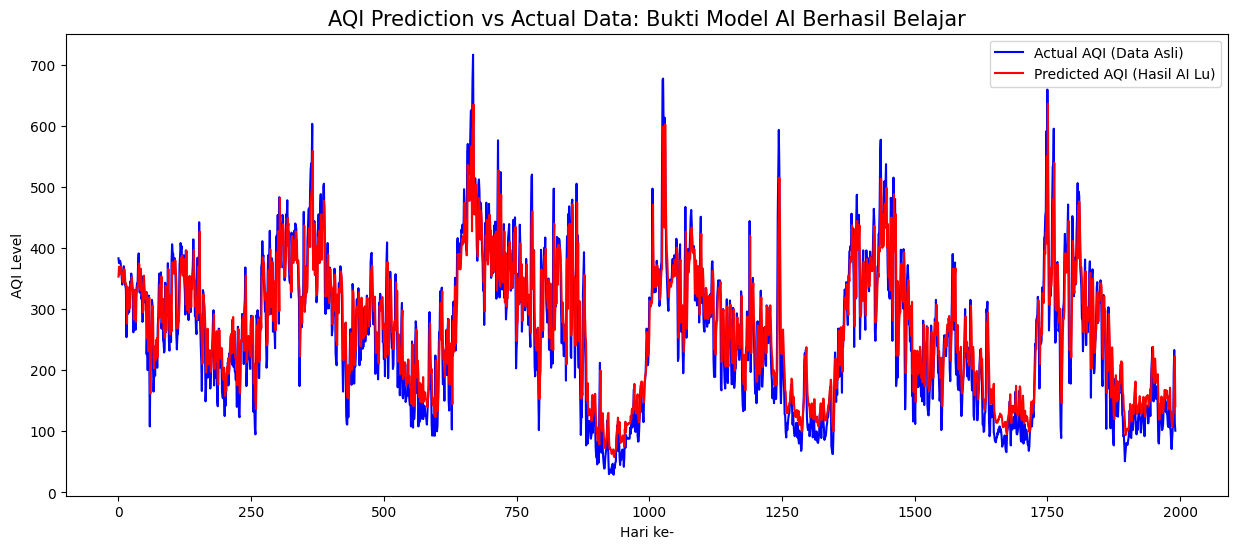

In [14]:

predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions) 
actual = scaler.inverse_transform(y.reshape(-1, 1))

plt.figure(figsize=(15, 6))
plt.plot(actual, color='blue', label='Actual AQI (Data Asli)')
plt.plot(predictions, color='red', label='Predicted AQI (Hasil AI Lu)')
plt.title('AQI Prediction vs Actual Data: Bukti Model AI Berhasil Belajar', fontsize=15)
plt.xlabel('Hari ke-')
plt.ylabel('AQI Level')
plt.legend()
plt.show()